In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)

font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.0
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.1


In [2]:
data = pd.read_csv('C:/Users/m/Desktop/project4/not_cate_data.csv')

In [3]:
data.head()

,사고일시,요일,사고유형,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고날짜,사고시간
0,2014-01-01 00:00:00,수요일,차대차,건조,맑음,단일로,승용,31,상해없음,승용,남,65.0,부상신고,2014-01-01,00:00:00
1,2014-01-01 01:00:00,수요일,차대차,기타,맑음,단일로,승용,32,상해없음,승용,남,54.0,중상,2014-01-01,01:00:00
2,2014-01-01 02:00:00,수요일,차대차,건조,맑음,단일로,승용,26,상해없음,승용,여,26.0,부상신고,2014-01-01,02:00:00
3,2014-01-01 02:00:00,수요일,차대차,건조,맑음,단일로,승용,29,상해없음,승용,남,25.0,경상,2014-01-01,02:00:00
4,2014-01-01 02:00:00,수요일,차대차,건조,맑음,교차로,승용,42,상해없음,승용,남,37.0,경상,2014-01-01,02:00:00


In [4]:
columns = ['피해운전자 연령', '피해운전자 상해정도']
df = data[columns]

In [5]:
df.isnull().sum()

피해운전자 연령      1275
피해운전자 상해정도    1275
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24047 entries, 0 to 24046
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   피해운전자 연령    22772 non-null  float64
 1   피해운전자 상해정도  22772 non-null  object 
dtypes: float64(1), object(1)
memory usage: 375.9+ KB


## 연령대별 상해정도

C:\Users\m\AppData\Local\Temp\ipykernel_18160\807785884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연령대'] = pd.cut(df['피해운전자 연령'], bins=bins, labels=labels, right=False)
C:\Users\m\AppData\Local\Temp\ipykernel_18160\807785884.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  연령대_상해정도 = df.groupby(['연령대', '피해운전자 상해정도']).size().unstack()


<Figure size 1200x800 with 0 Axes>

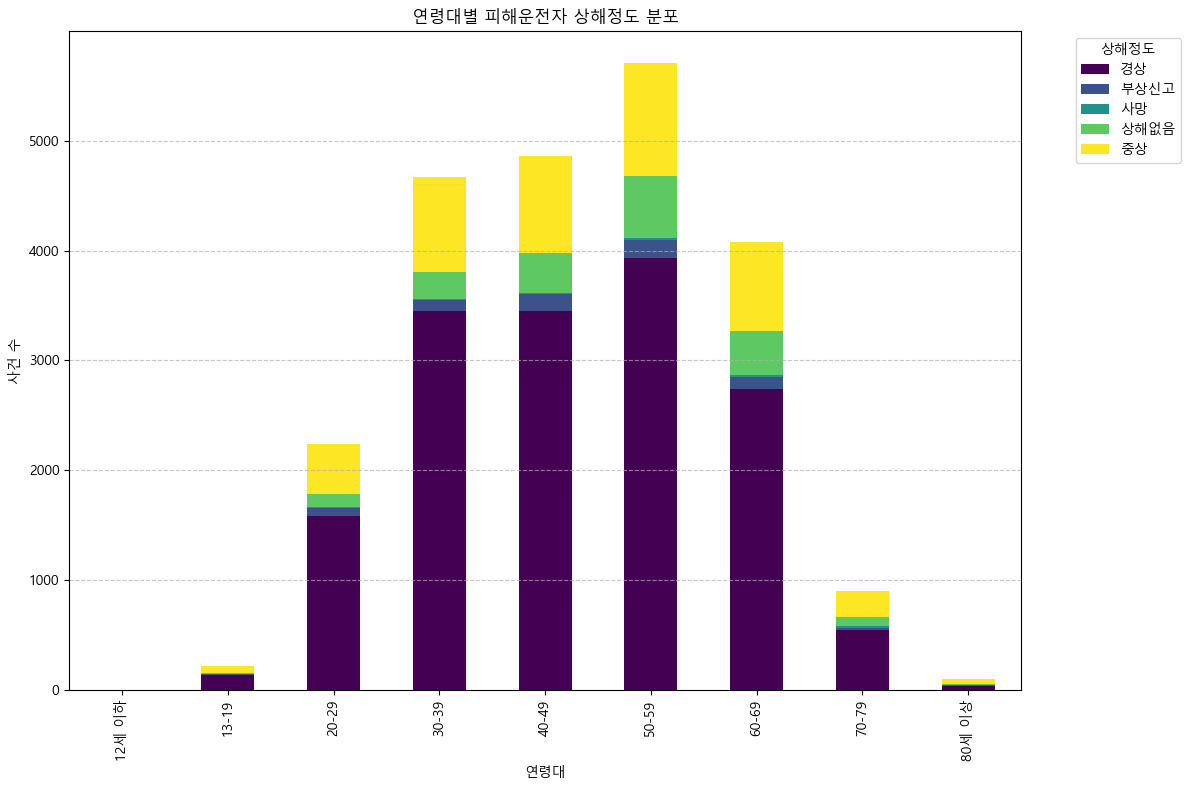

In [7]:
# 연령대를 맞춰서 구분
bins = [0, 12, 19, 29, 39, 49, 59, 69, 79, float('inf')]
labels = ['12세 이하', '13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80세 이상']

# 연령대 구분 열 생성
df['연령대'] = pd.cut(df['피해운전자 연령'], bins=bins, labels=labels, right=False)

# 상해 정도별로 연령대별 집계
연령대_상해정도 = df.groupby(['연령대', '피해운전자 상해정도']).size().unstack()

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
연령대_상해정도.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))

# 그래프 설정
plt.title('연령대별 피해운전자 상해정도 분포')
plt.xlabel('연령대')
plt.ylabel('사건 수')
plt.legend(title='상해정도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\m\AppData\Local\Temp\ipykernel_18160\3639994200.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연령대'] = pd.cut(df['피해운전자 연령'], bins=bins, labels=labels, right=False)
C:\Users\m\AppData\Local\Temp\ipykernel_18160\3639994200.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  연령대_상해정도 = df.groupby(['연령대', '피해운전자 상해정도']).size().unstack()


<Figure size 1200x800 with 0 Axes>

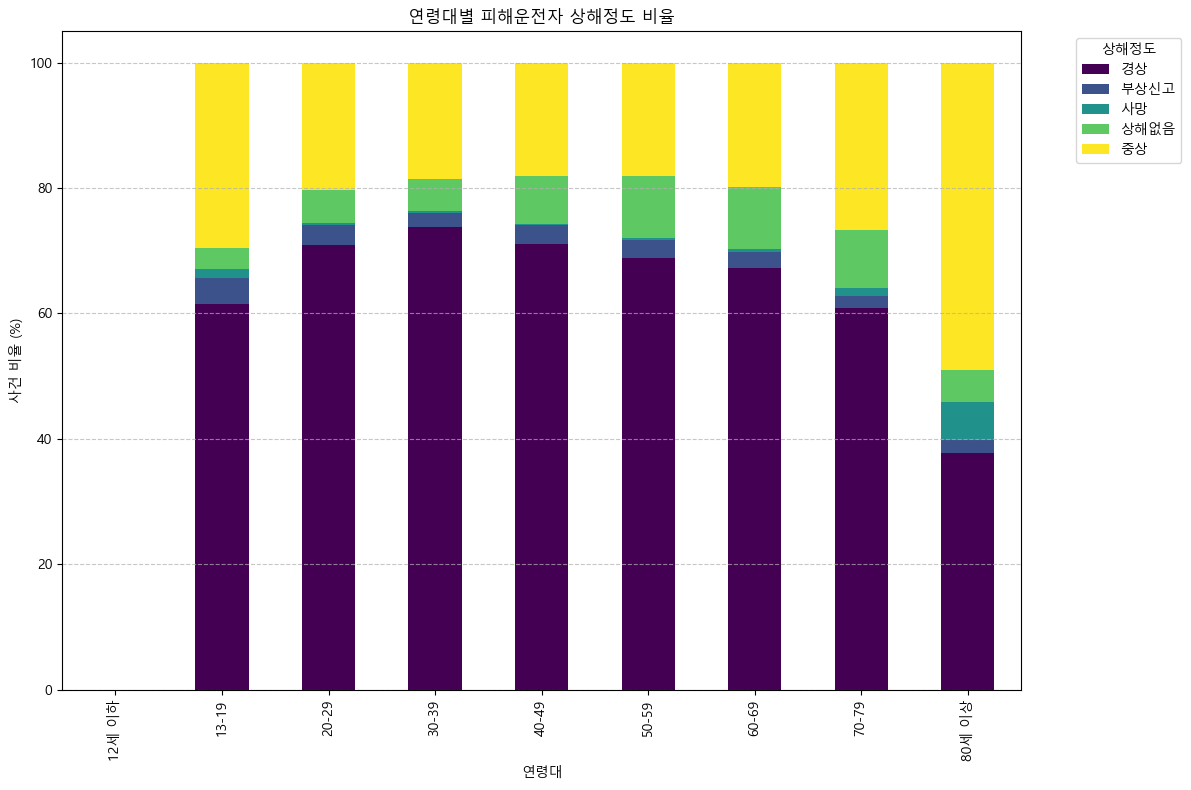

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 연령대를 맞춰서 구분
bins = [0, 12, 19, 29, 39, 49, 59, 69, 79, float('inf')]
labels = ['12세 이하', '13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80세 이상']

# 연령대 구분 열 생성
df['연령대'] = pd.cut(df['피해운전자 연령'], bins=bins, labels=labels, right=False)

# 연령대별 상해정도 집계
연령대_상해정도 = df.groupby(['연령대', '피해운전자 상해정도']).size().unstack()

# 각 연령대의 총 사건 수 계산
총사건수_연령대 = 연령대_상해정도.sum(axis=1)

# 비율로 변환 (백분율)
비율_연령대_상해정도 = 연령대_상해정도.divide(총사건수_연령대, axis=0) * 100

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
비율_연령대_상해정도.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))

# 그래프 설정
plt.title('연령대별 피해운전자 상해정도 비율')
plt.xlabel('연령대')
plt.ylabel('사건 비율 (%)')
plt.legend(title='상해정도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\m\AppData\Local\Temp\ipykernel_18160\93797111.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연령대'] = pd.cut(df['피해운전자 연령'], bins=bins, labels=labels, right=False)


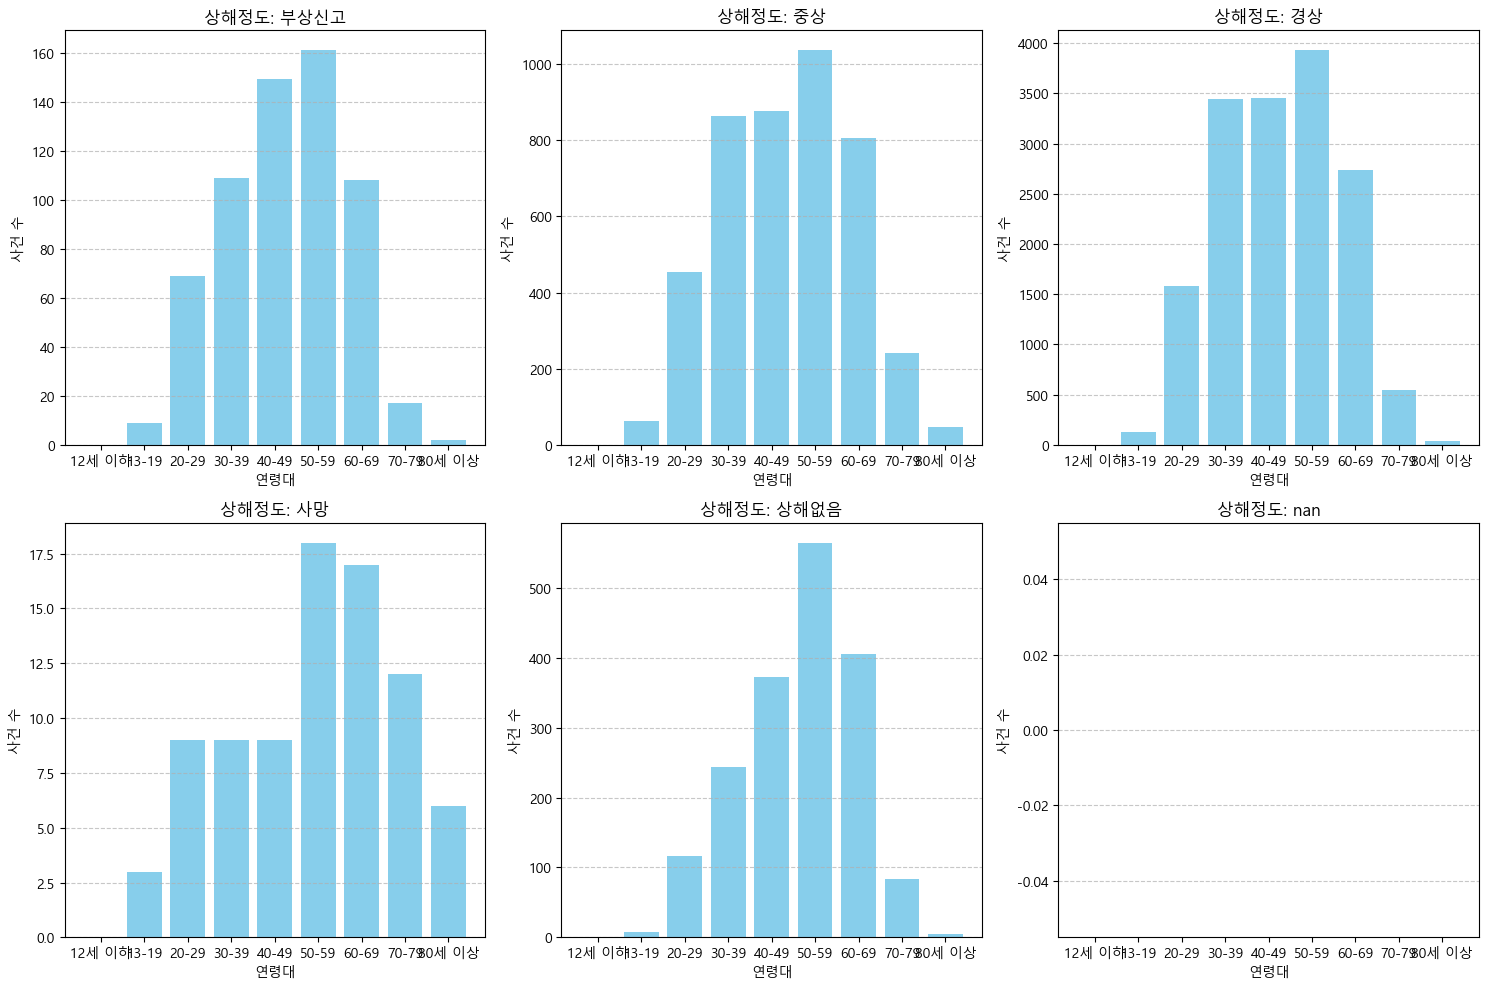

In [9]:

# 데이터 준비 (예시로 df를 정의합니다)
# df = ... (이미 연령대와 상해정도가 포함된 데이터프레임을 가정합니다)

# 연령대를 맞춰서 구분
bins = [0, 12, 19, 29, 39, 49, 59, 69, 79, float('inf')]
labels = ['12세 이하', '13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80세 이상']

# 연령대 구분 열 생성
df['연령대'] = pd.cut(df['피해운전자 연령'], bins=bins, labels=labels, right=False)

# 상해 정도 목록
상해정도_목록 = df['피해운전자 상해정도'].unique()

plt.figure(figsize=(15, 10))

# 각 상해정도별로 서브플롯을 생성
for i, 상해정도 in enumerate(상해정도_목록):
    plt.subplot(2, 3, i+1)  # 2x3 그리드에서 i+1 위치에 서브플롯 생성
    
    # 현재 상해정도에 해당하는 데이터 필터링
    subset = df[df['피해운전자 상해정도'] == 상해정도]
    
    # 연령대별 사건 수 집계
    연령대_상해정도 = subset['연령대'].value_counts().reindex(labels, fill_value=0)
    
    # 막대 그래프 그리기
    plt.bar(연령대_상해정도.index, 연령대_상해정도.values, color='skyblue')
    plt.title(f'상해정도: {상해정도}')
    plt.xlabel('연령대')
    plt.ylabel('사건 수')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



C:\Users\m\AppData\Local\Temp\ipykernel_18160\3676765529.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연령대'] = pd.cut(df['피해운전자 연령'], bins=bins, labels=labels, right=False)


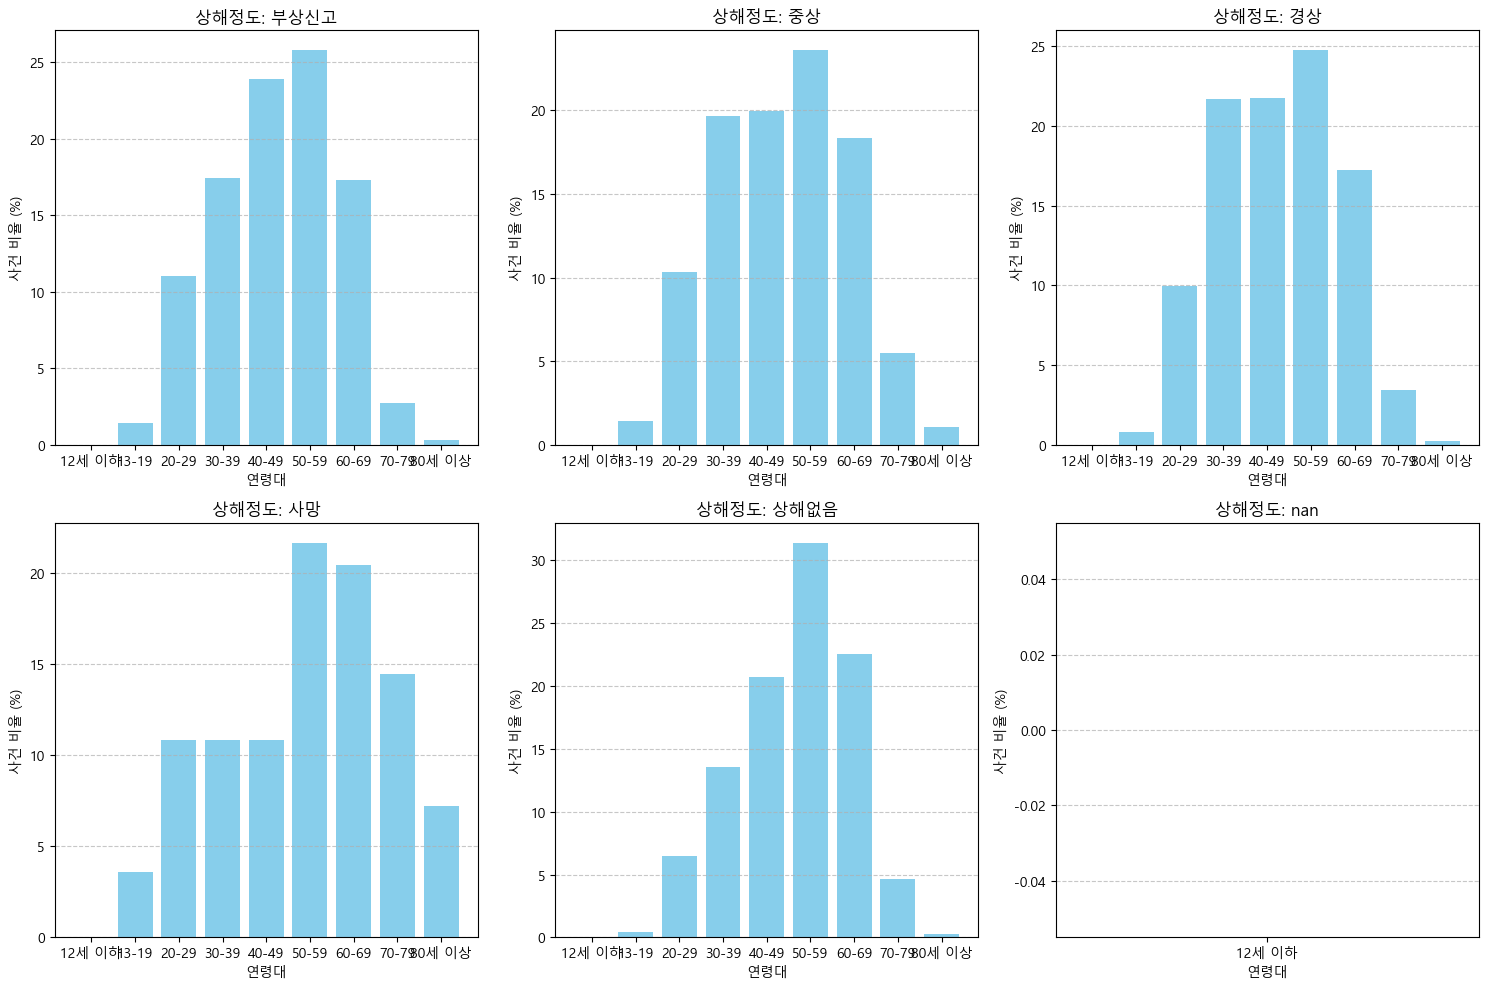

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 연령대를 맞춰서 구분
bins = [0, 12, 19, 29, 39, 49, 59, 69, 79, float('inf')]
labels = ['12세 이하', '13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80세 이상']

# 연령대 구분 열 생성
df['연령대'] = pd.cut(df['피해운전자 연령'], bins=bins, labels=labels, right=False)

# 상해 정도 목록
상해정도_목록 = df['피해운전자 상해정도'].unique()

plt.figure(figsize=(15, 10))

# 각 상해정도별로 서브플롯을 생성
for i, 상해정도 in enumerate(상해정도_목록):
    plt.subplot(2, 3, i+1)  # 2x3 그리드에서 i+1 위치에 서브플롯 생성
    
    # 현재 상해정도에 해당하는 데이터 필터링
    subset = df[df['피해운전자 상해정도'] == 상해정도]
    
    # 연령대별 사건 수 집계
    연령대_상해정도 = subset['연령대'].value_counts().reindex(labels, fill_value=0)
    
    # 전체 사건 수
    total = 연령대_상해정도.sum()
    
    # 비율로 변환 (백분율)
    비율_연령대_상해정도 = (연령대_상해정도 / total) * 100
    
    # 막대 그래프 그리기
    plt.bar(비율_연령대_상해정도.index, 비율_연령대_상해정도.values, color='skyblue')
    plt.title(f'상해정도: {상해정도}')
    plt.xlabel('연령대')
    plt.ylabel('사건 비율 (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## 전처리한 데이터로 변경

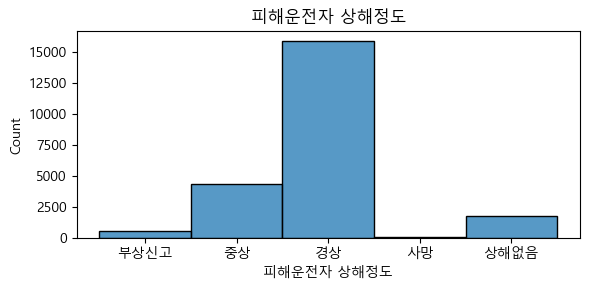

In [11]:
# 피해운전자 상해 정도의 분포
plt.figure(figsize=(6, 3))
sns.histplot(data['피해운전자 상해정도'])
plt.title('피해운전자 상해정도')
plt.tight_layout()
plt.show()

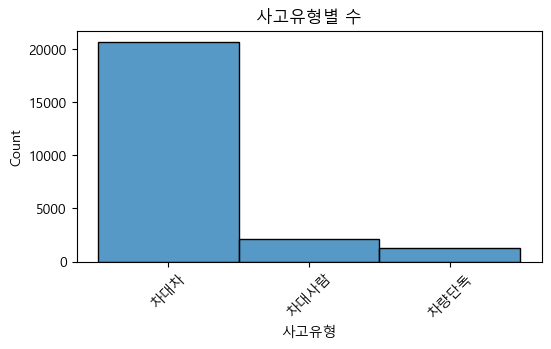

In [12]:
# 사고유형별 어떤 분포인지(막대그래프)
fig = plt.figure(figsize=(6,3))
sns.histplot(data['사고유형'])
plt.xticks(rotation=45)
plt.title('사고유형별 수')
plt.show()

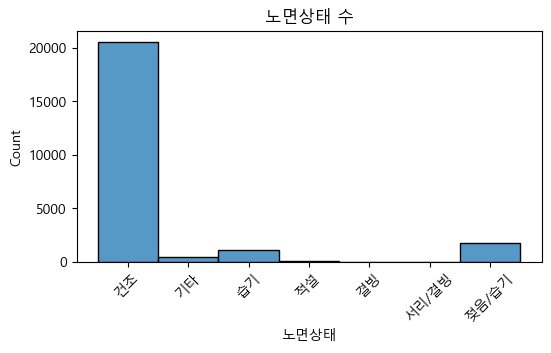

In [13]:
# 노면상태별 어떤 분포인지(막대그래프)
fig = plt.figure(figsize=(6,3))
sns.histplot(data['노면상태'])
plt.xticks(rotation=45)
plt.title('노면상태 수')
plt.show()

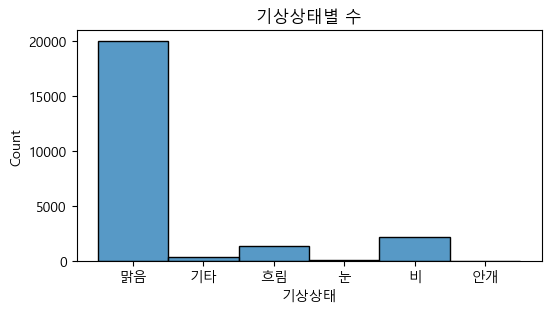

In [14]:
fig = plt.figure(figsize=(6,3))
sns.histplot(data['기상상태'])
plt.title('기상상태별 수')
plt.show()

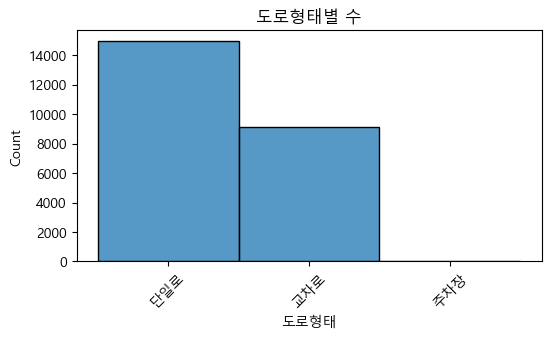

In [15]:
fig = plt.figure(figsize=(6,3))
sns.histplot(data['도로형태'])
plt.xticks(rotation=45)
plt.title('도로형태별 수')
plt.show()

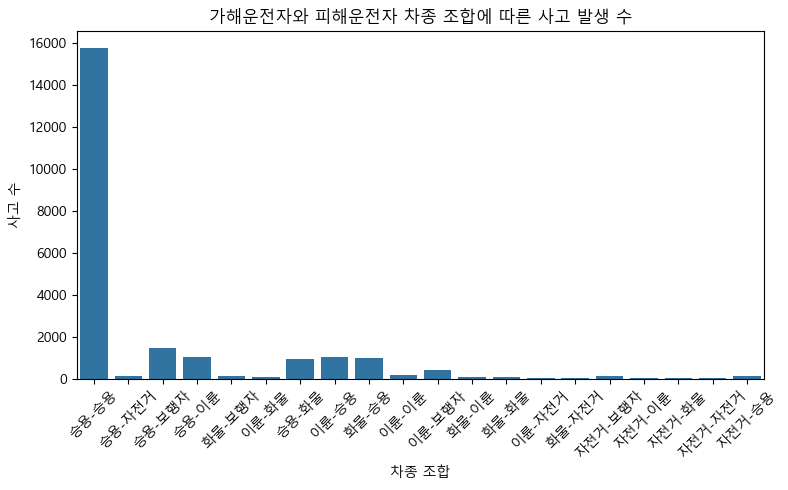

In [16]:
# 차종 조합 그래프
data['차종 조합'] = data['가해운전자 차종'] + '-' + data['피해운전자 차종']

plt.figure(figsize=(8, 5))
sns.countplot(x='차종 조합', data=data)
plt.xticks(rotation=45)  # x축 라벨 45도 회전
plt.title('가해운전자와 피해운전자 차종 조합에 따른 사고 발생 수')
plt.xlabel('차종 조합')
plt.ylabel('사고 수')
plt.tight_layout()
plt.show()

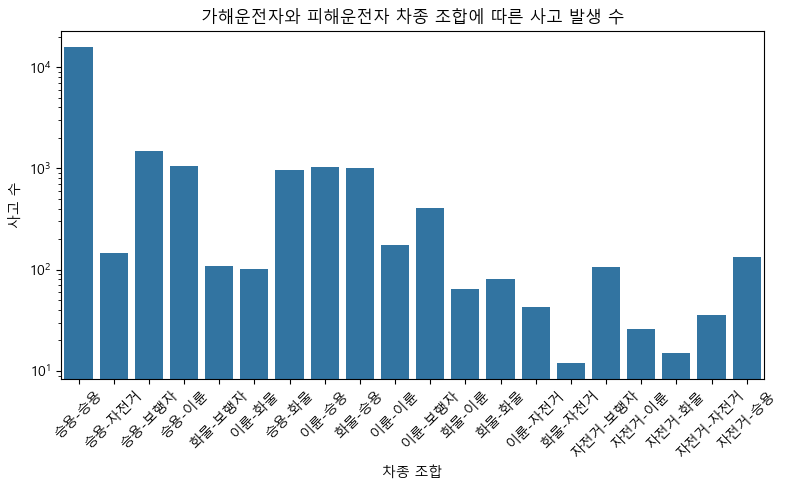

In [17]:
# 차종 조합 그래프
data['차종 조합'] = data['가해운전자 차종'] + '-' + data['피해운전자 차종']

plt.figure(figsize=(8, 5))
sns.countplot(x='차종 조합', data=data)
plt.xticks(rotation=45)  # x축 라벨 45도 회전
plt.title('가해운전자와 피해운전자 차종 조합에 따른 사고 발생 수')
plt.xlabel('차종 조합')
plt.ylabel('사고 수')
plt.yscale('log')
plt.tight_layout()
plt.show()

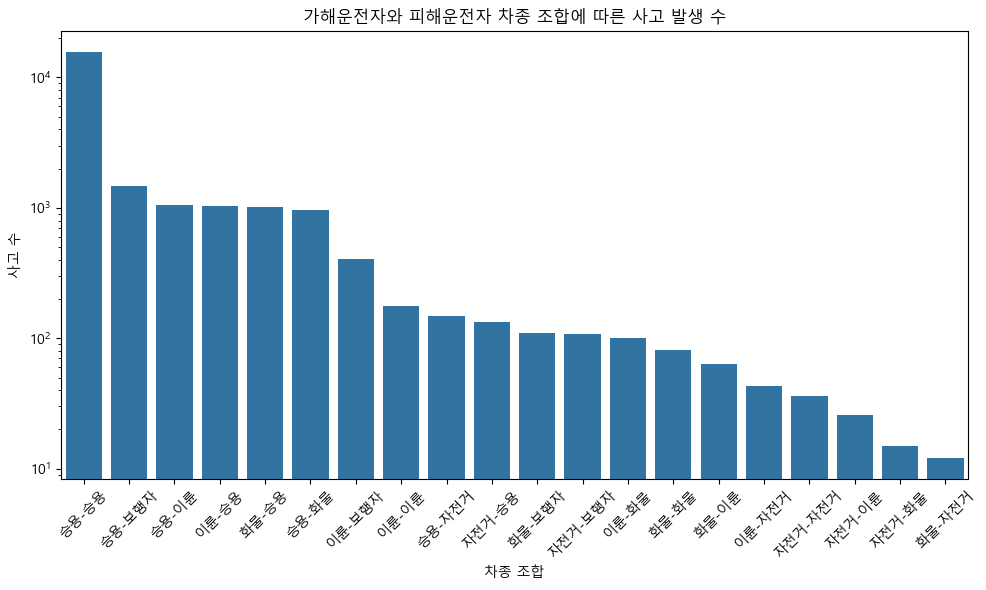

In [18]:
data['차종 조합'] = data['가해운전자 차종'] + '-' + data['피해운전자 차종']

# 사고 수 계산
order = data['차종 조합'].value_counts().index

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.countplot(x='차종 조합', data=data, order=order)
plt.xticks(rotation=45)  # x축 라벨 45도 회전
plt.title('가해운전자와 피해운전자 차종 조합에 따른 사고 발생 수')
plt.xlabel('차종 조합')
plt.ylabel('사고 수')
plt.yscale('log')
plt.tight_layout()
plt.show()

## 차종 별 상해정도